In [1]:
# importing prerequisite libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Let's understand the structure of figure:
* The base visulation of matplotlib is `figure` object

Below we first create a simple structure and then we add the axis etc to structure so that we have more control over it.
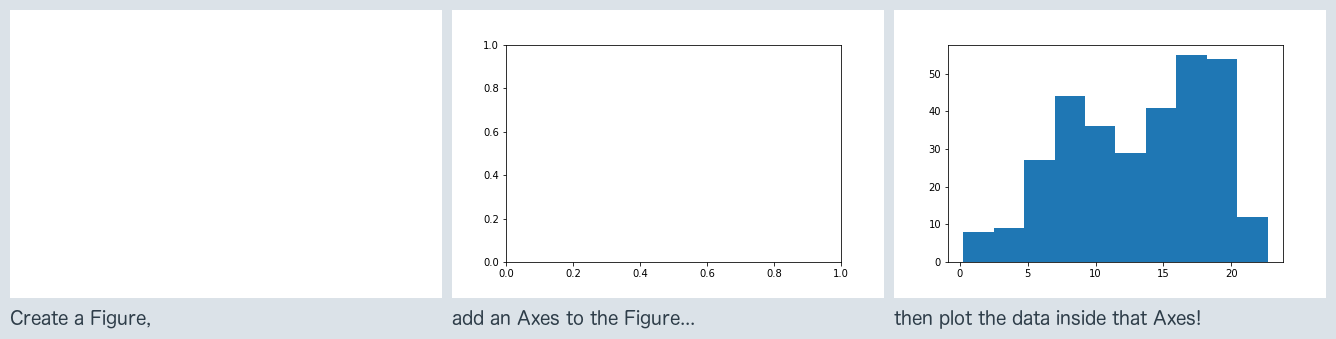

In [2]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


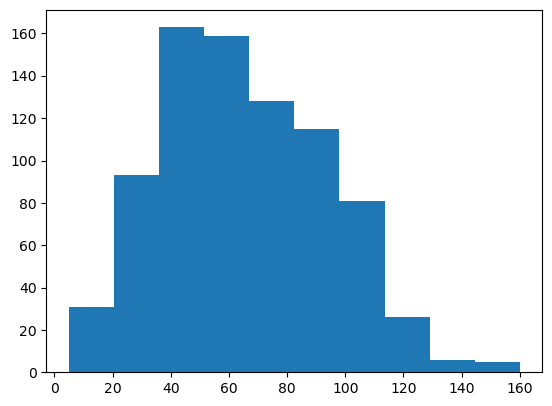

In [3]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([0,0, .775, .755])
ax.hist(data=pokemon, x='speed');

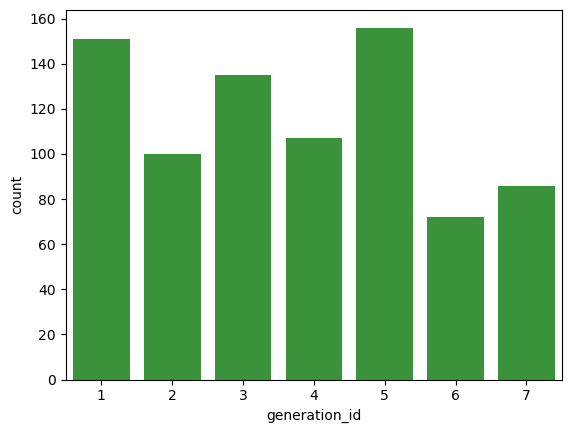

In [4]:
base_color = sb.color_palette()[2]
sb.countplot(pokemon,x='generation_id',color=base_color);

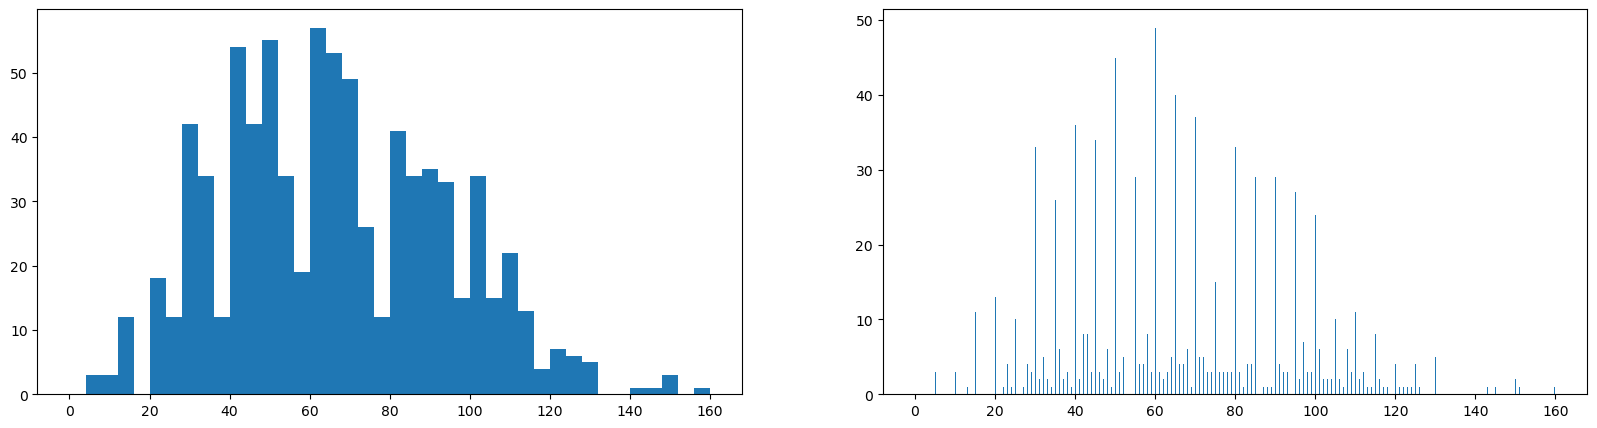

In [5]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 

bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

In [6]:
die_rolls = pd.read_csv('./die-rolls.csv')
# A fair dice has six-faces having numbers [1-6]. 
# There are 100 dices, and two trials were conducted.
# In each trial, all 100 dices were rolled down, and the outcome [1-6] was recorded.
# The `Sum` column represents the sum of the outcomes in the two trials, for each given dice. 
die_rolls.head()

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9


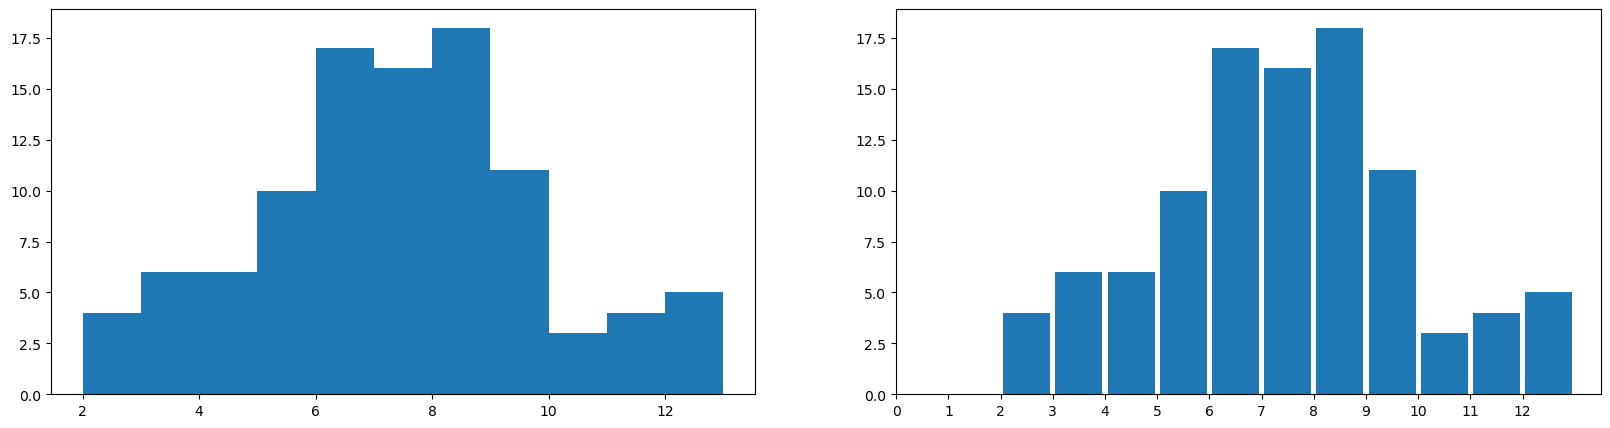

In [7]:

plt.figure(figsize=[20,5])

bin_edges = np.arange(2,12+1.1, 1)
plt.subplot(1,2,1)
plt.hist(data=die_rolls,bins=bin_edges, x='Sum')


# subplot # 2
plt.subplot(1,2,2)

# Below rwidth/relative width will set the proportion of the x data like below 90% will be will and remaining 10% will be empty
# Gaps between bars makes it clear that the data is discrete in nature.

plt.hist(data=die_rolls,x='Sum',bins=bin_edges, rwidth=0.9)
# adding custom xticks to the subplot # 2
plt.xticks(np.arange(0,13,1));

<h2 class="btn btn-danger">Descriptive Statistics, Outliers, and Axis Limits</h2>


In [8]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


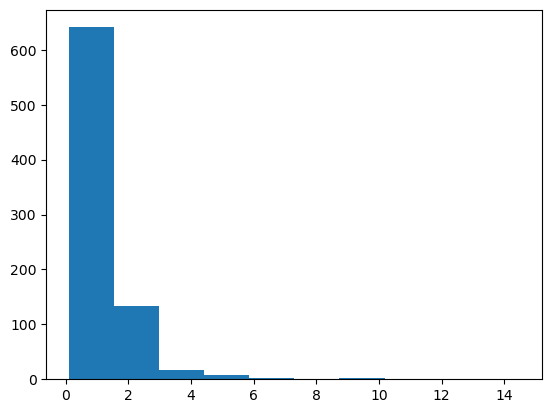

In [9]:
# here we can see that plot is skewed on left 
max_value = pokemon['height'].max()

# this will find the frequency of the maximum value in height column which is '1' and here also called the outlier
pokemon['height'].value_counts()[max_value]

# we can see the values in the range of 14 will make the model error prone so we have to show only 0-6 range.
plt.hist(data=pokemon,x='height');


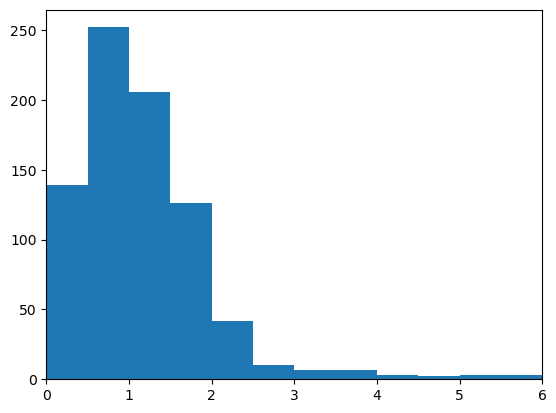

In [10]:
# Get the ticks for bins between [0-15], at an interval of 0.5

bins = np.arange(0,max_value,0.5)

plt.hist(data=pokemon,x='height',bins=bins);

# xlim will take the x-axis limit in tuple
plt.xlim((0,6));


# plt.ylim((0,200))  # we can also specify the y-limit which will set the upper and lower bound of the y-axis e.g
# below we have upper bound and lower bound is ( 0, 250 )

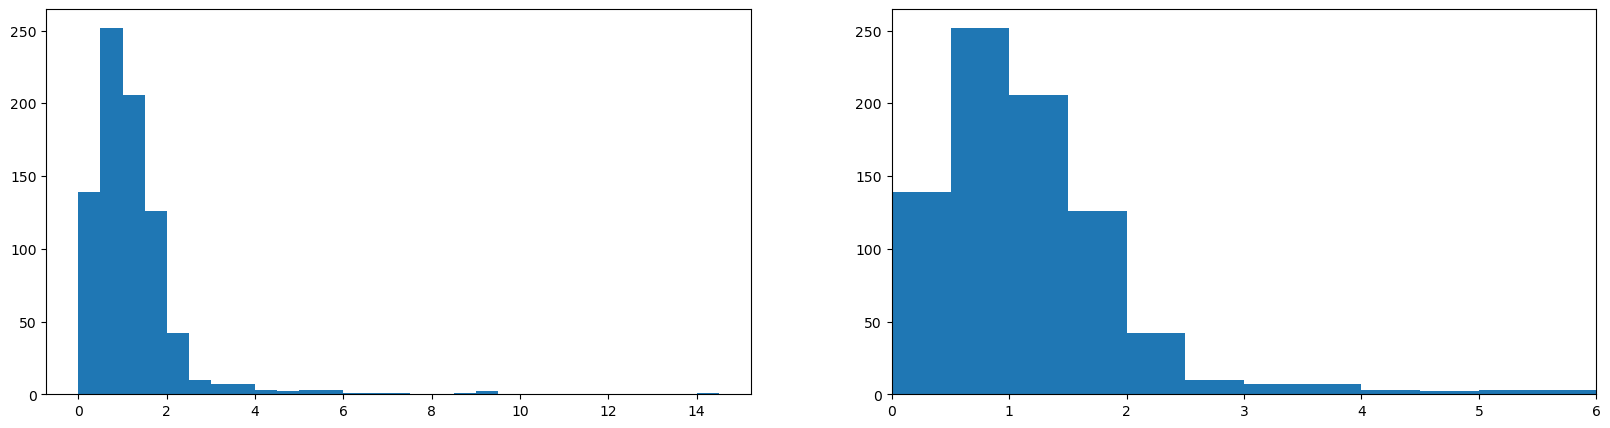

In [11]:
# bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
# plt.hist(data=pokemon, x='height', bins=bins);
# plt.xlim((0,6));

plt.figure(figsize=(20,5))


# Creating bins for both of the plots
bins = np.arange(0,max_value+0.5,0.5)

# Left plot in the figure
plt.subplot(1,2,1)
plt.hist(data=pokemon,x='height',bins=bins)


# Right plot in the figure
plt.subplot(1,2,2)
plt.hist(data=pokemon,x='height',bins=bins)
plt.xlim((0,6));

# As we can see the right plot is more readable and accurate than the left one. because plot on left contain outliers

<h2 style='color:yellow'>Scales and Transformations</h2>


In [15]:
# Now what this actually that it's say what we put at the power of 10 so that we get exactly 100.
from math import log10,log2
print(log10(100))

# what number should we insert so that we get 10 at the power of 2. e.g. 2^x = 16
print(log2(16))

2.0
4.0


In [17]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [50]:
np.log10(pokemon['weight'].describe())

# Now here min and max gives us the range of bins to us which we will start from -1 (minimum) and will go upto 3

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

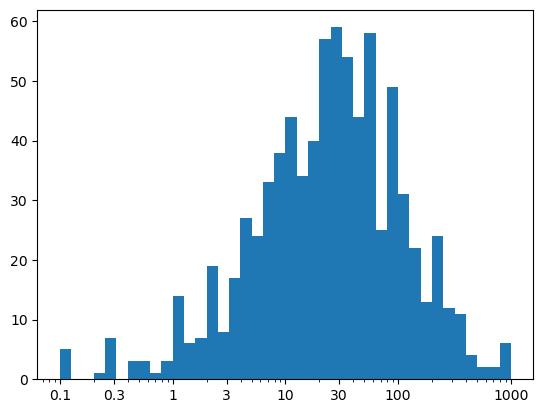

In [60]:
bins = 10 ** (np.arange(-1, 3 + 0.1, 0.1))
plt.hist(data=pokemon,x='weight',bins=bins)
plt.xscale('log')

# placing ticks values 
ticks = [0.1, 0.3 ,1, 3, 10, 30, 100, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels);



In [61]:
%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

In [68]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## TO DO **Task 1**
There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4]


(0.0, 6.0)

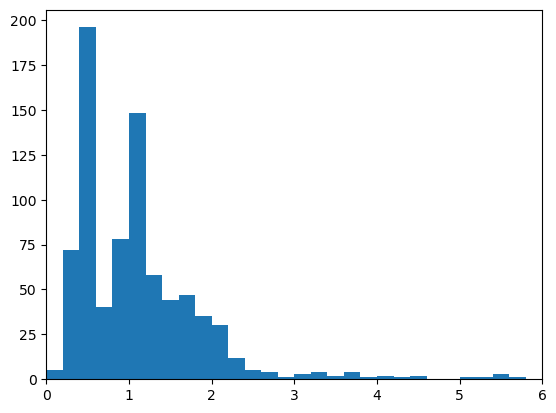

In [112]:
# YOUR CODE HERE

# To select the right bin width for the histogram we need to find min and max of pokemon['height']
print(pokemon['height'].describe())
bins = np.arange(0, pokemon['height'].max(), .2 )
print(bins)

plt.hist(data=pokemon,x='height',bins=bins)
plt.xlim((0,6))

## Expected Output: TO DO Task 1

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


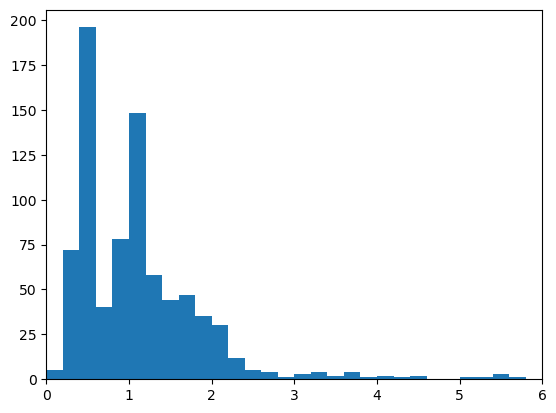

In [70]:
# run this cell to check your work against ours
scales_solution_1()

## TO DO **Task 2**
In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

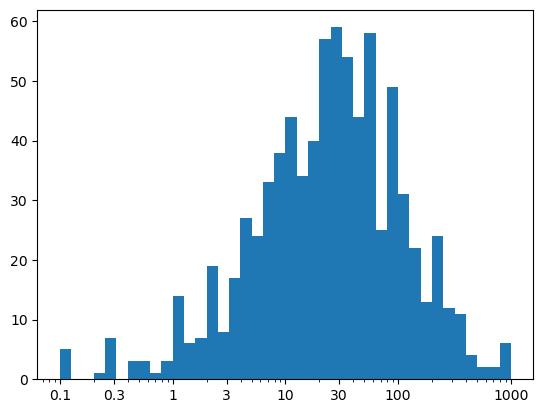

In [122]:
# YOUR CODE HERE
bins = 10 ** (np.arange(-1, 3 + 0.1, 0.1))
plt.hist(data=pokemon,x='weight',bins=bins)
plt.xscale('log')
ticks = [0.1, 0.3 ,1, 3, 10, 30, 100, 1000]
labels = ['{}'.format(v) for v in ticks]

plt.xticks(ticks,labels);

## Expected Output: TO DO Task 2

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


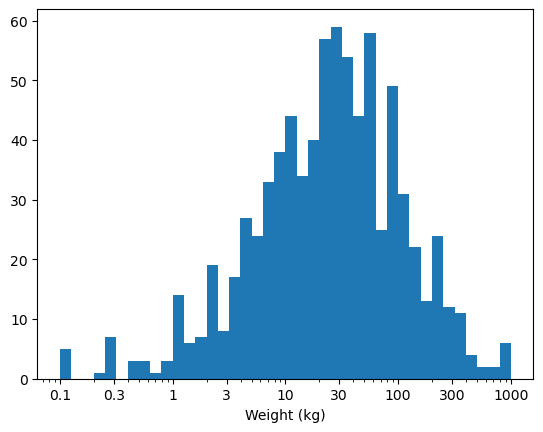

In [123]:
# run this cell to check your work against ours
scales_solution_2()